In [41]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation
from IPython.display import HTML

In [42]:
HIDDEN_MU = [49.3, 50, 86.2, 87.6, 108.1, 109.4, 139.1, 138, 155.9, 170.7]
HIDDEN_SIGMA = [1.88, 1.87, 3.24, 3.08, 4.91, 4.61, 6.97, 6.88,  6.32, 6.63] 
def get_data_a(n=1000, k=0):
  return np.random.randn(n) * HIDDEN_SIGMA[k] + HIDDEN_MU[k]

HIDDEN_PI = np.random.dirichlet([1, 1, 1])
HIDDEN_PI = np.array([.514, .486, .513, .487, .512, .488, .514, .486, .55, .45])
HIDDEN_PI /= np.sum(HIDDEN_PI) 
def get_responsibilities(p, n=10000):
  n_per_cluster = np.random.multinomial(n, p)
  r = [[k] * n_k for k, n_k in enumerate(n_per_cluster)]
  r = np.concatenate(r)
  np.random.shuffle(r)
  return r

R = get_responsibilities(HIDDEN_PI)
def get_data_b():
  y = np.random.randn(len(R))
  for t, k in enumerate(R):
    y[t] *= HIDDEN_SIGMA[k]
    y[t] += HIDDEN_MU[k]
  return y

def get_data_c(n_x=6):
  return np.eye(n_x * 3).reshape((-1, n_x, 3))

In [43]:
plt.rcParams['figure.figsize'] = [12, 2.5]
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.3)

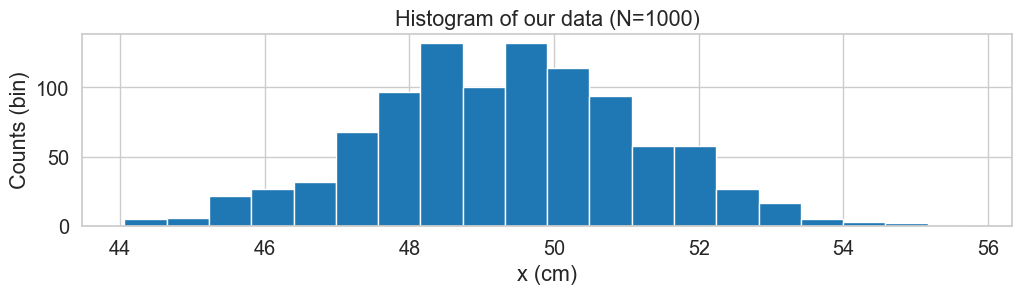

In [44]:
x_a = get_data_a()
counts, bins, _ = plt.hist(x_a, bins=20)
plt.title(f'Histogram of our data (N={len(x_a)})')
plt.ylabel('Counts (bin)')
plt.xlabel('x (cm)');

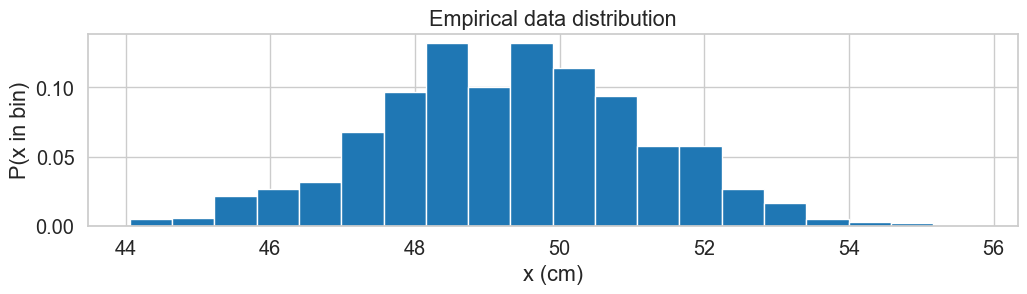

In [45]:
p_bins = counts / np.sum(counts)

dx = bins[1] - bins[0]
bin_centers = bins[:-1] + dx / 2
plt.bar(bin_centers, p_bins, dx)
plt.title('Empirical data distribution')
plt.ylabel('P(x in bin)')
plt.xlabel('x (cm)');

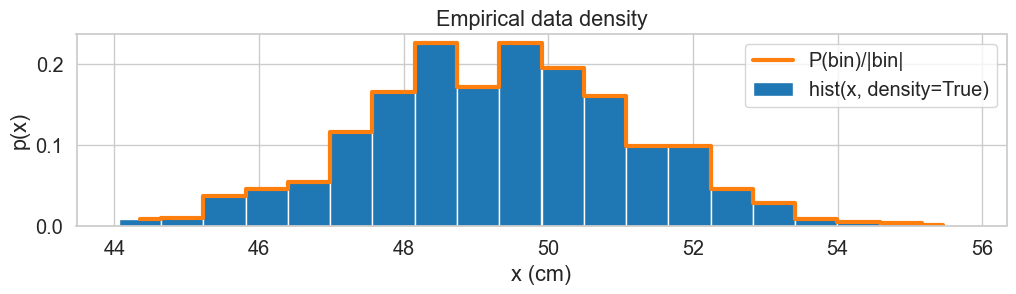

In [46]:
p_bins_density = p_bins / dx
plt.step(bin_centers, p_bins_density, 
         where='mid', c='tab:orange', lw=3, label=r'P(bin)/|bin|')
plt.hist(x_a, bins=20, density=True, 
         label='hist(x, density=True)')

plt.title('Empirical data density')
plt.ylabel('p(x)')
plt.xlabel('x (cm)');
plt.legend()

In [47]:
def bell_curve(x, mu, sigma_2):
    y = np.exp(- (x - mu)**2 / 2 / sigma_2)
    y /= np.sqrt(2 * np.pi * sigma_2)
    return y

In [48]:
x_mean, x_var, n_x = np.mean(x_a), np.var(x_a), len(x_a)
print('Mean of our data: {:.2g}cm, variance: {:.2g}cm^2 (N={})'.format(x_mean, x_var, n_x))

Mean of our data: 49cm, variance: 3.4cm^2 (N=1000)


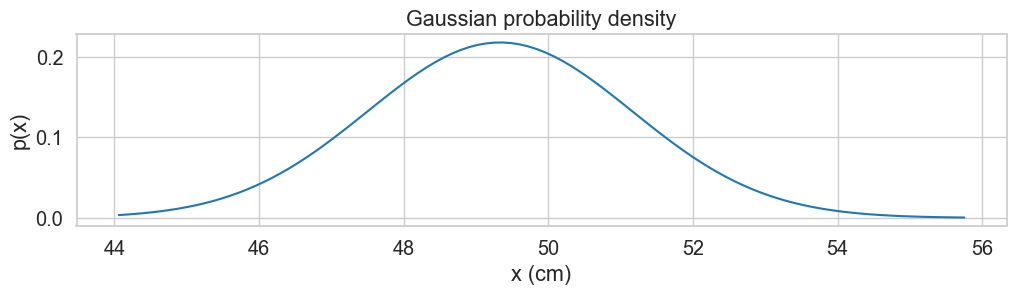

In [49]:
x_ = np.linspace(np.min(x_a), np.max(x_a), 100)
p_x = bell_curve(x_, x_mean, x_var)
plt.plot(x_, p_x)
plt.title(r'Gaussian probability density')
plt.ylabel('p(x)')
plt.xlabel('x (cm)');

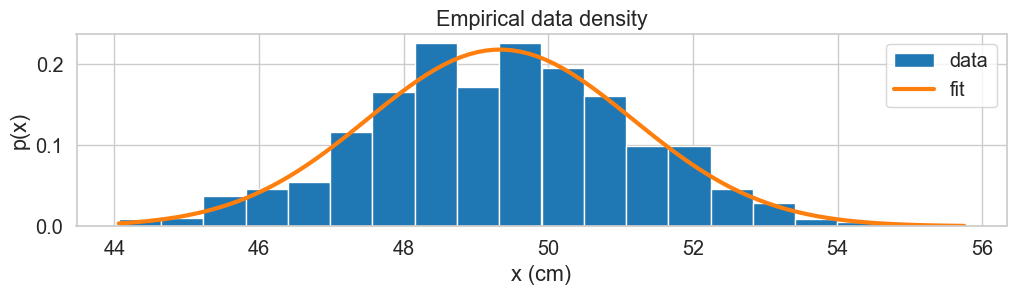

In [50]:
plt.hist(x_a, bins=20, density=True, label='data')
plt.plot(x_, p_x, lw=3, label='fit')
plt.title('Empirical data density')
plt.ylabel('p(x)')
plt.xlabel('x (cm)');
plt.legend();

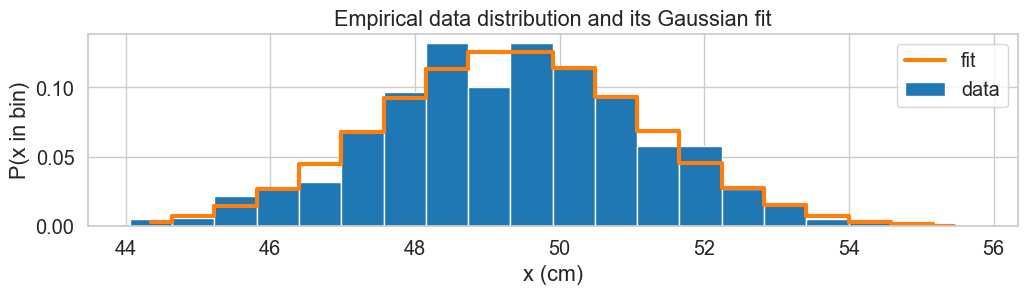

In [51]:
plt.bar(bin_centers, p_bins, dx, label='data')

p_gauss_bins = dx * bell_curve(bin_centers, x_mean, x_var)
plt.step(bin_centers, p_gauss_bins, where='mid', c='tab:orange', lw=3, 
         label='fit')

plt.title('Empirical data distribution and its Gaussian fit')
plt.ylabel('P(x in bin)')
plt.xlabel('x (cm)');
plt.legend();

In [53]:
def log_loss_gaussian(x_, mu, sigma_2):
  log_p = ((x_ - mu)**2 / sigma_2  + np.log(sigma_2) + np.log(2 * np.pi)) / 2
  return np.sum(log_p)

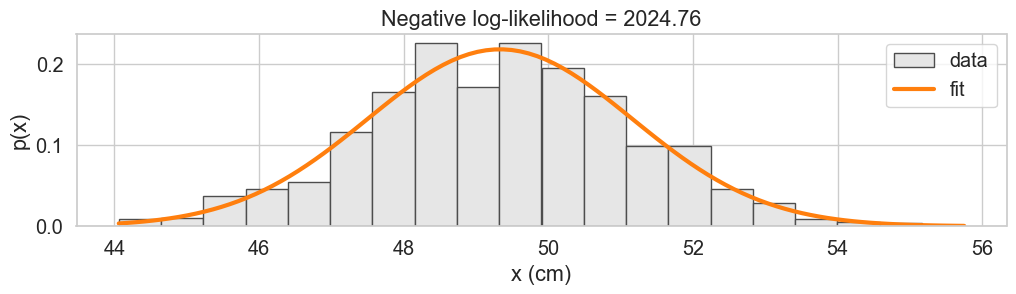

In [108]:
mu = 49.33 # {min:40, max:60}
sigma_2 = 3.35 # {min:0, max:100}

plt.hist(x_a, bins=20, density=True, label='data',
         facecolor='.9', edgecolor='.3')
plt.plot(x_, bell_curve(x_, mu, sigma_2), lw=3, label='fit')
plt.title('Negative log-likelihood = {:.2f}'.format(log_loss_gaussian(x_a, mu, sigma_2)))
plt.ylabel('p(x)')
plt.xlabel('x (cm)');
plt.legend();